In [370]:
import pandas as pd
import numpy as np

# Getting to know about the dataset



In [371]:
train_df = pd.read_csv('/content/train.csv')
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [372]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [373]:
#We have many columns and therefore, many null values, but before treating them, it is necessary to see the
#percentage of null values ​​per column and thus know which columns will hinder/help the prediction.
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [374]:
to_eliminate = train_df.columns[(train_df.isnull().sum()/train_df.shape[0]) > 0.1]
to_eliminate

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [375]:
#The first 6 columns listed above have more than 17% of null values, for this reason they will be excluded
train_df = train_df.drop(to_eliminate, axis=1)

In [376]:
#Checking again, now I'll check without those columns
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending = False).head(14)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
PavedDrive      0.000000
dtype: float64

In [377]:
#Selecting the numerics columns
numerics = train_df.columns[train_df.dtypes != 'object']
numerics

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [378]:
#Copying the data to the new base
train_df_2 = train_df.loc[:,numerics]
train_df_2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [379]:
#Checking null values on the new dataframe
train_df_2.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [380]:
#Selecting only columns with numeric types, follow one of the best practice rules, and I will exchange empty
#values ​​for -1, in order to avoid problems when executing the algorithm
train_df_2 = train_df_2.fillna(-1)

In [381]:
#The dataframe is ready!
train_df_2.isnull().sum().sort_values(ascending=False)

Id               0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
MSSubClass       0
BsmtHalfBath     0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

# Time to do the same thing with the Test.csv

In [382]:
test_df = pd.read_csv('/content/test.csv')
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [383]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [384]:
#We have many columns and therefore, many null values, but before treating them, it is necessary to see the
#percentage of null values ​​per column and thus know which columns will hinder/help the prediction.
(test_df.isnull().sum()/test_df.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
dtype: float64

In [385]:
#We have many columns and therefore, many null values, but before treating them, it is necessary to see the
#percentage of null values ​​per column and thus know which columns will hinder/help the prediction.
to_eliminate = test_df.columns[(test_df.isnull().sum()/test_df.shape[0]) > 0.1]
to_eliminate

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [386]:
#The first 6 columns listed above have more than 17% of null values, for this reason they will be excluded
test_df = test_df.drop(to_eliminate, axis=1)

In [387]:
#Checking again, now I'll check without those columns
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending = False).head(14)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
PavedDrive      0.000000
dtype: float64

In [388]:
#Selecting the numerics columns
numerics = test_df.columns[test_df.dtypes != 'object']
numerics

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [389]:
#Copying the data to the new base
test_df_2 = test_df.loc[:,numerics]
test_df_2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [390]:
#Checking null values on the new dataframe
test_df_2.isnull().sum().sort_values(ascending=False)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
Fireplaces        0
FullBath          0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
MSSubClass        0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
LotArea           0
YrSold            0
dtype: int64

In [391]:
# Selecting only columns with numeric types, follow one of the best practice rules, and I will exchange empty
#values ​​for -1, in order to avoid problems when executing the algorithm
test_df_2 = test_df_2.fillna(-1)

In [392]:
#The dataset is ready!
test_df_2.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

# Time to separate the dataframes into training and testing to apply the algorithm
  - [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

# I will test the model with 3 algorithms and thus obtain the best result.
  - [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
  - [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
  - [K Neighbor Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

# To find the best algorithm, as the challenge itself has already informed, I will use the one with the least square errors between the logarithms of the values.
[Mean Squaded Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [393]:
#Imports and spliting the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = train_df_2.drop(['Id','SalePrice'],axis=1)
y = train_df_2.SalePrice
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [394]:
# Linear Regression
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_validation)

In [395]:
#Decision Trees
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_validation)

In [396]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

clf_knn = KNeighborsRegressor(n_neighbors=2)
clf_knn = clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_validation)

# Checking the value of each algorithm to define the best one, in this case, the one with the fewest errors

In [397]:
#Linear Regression squared error
mean_squared_error(y_validation, y_pred_lr)

1295744976.9598572

In [398]:
#Decision Tree squared error
mean_squared_error(y_validation,y_pred_dt)

3977638166.359589

In [399]:
# KNeighbors squared error
mean_squared_error(y_validation,y_pred_knn)

2519095544.4760275

# I already know which model is best, but graphically display the relationship between the test/prediction value and thus better illustrate the general panorama.
  - For this I will use [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

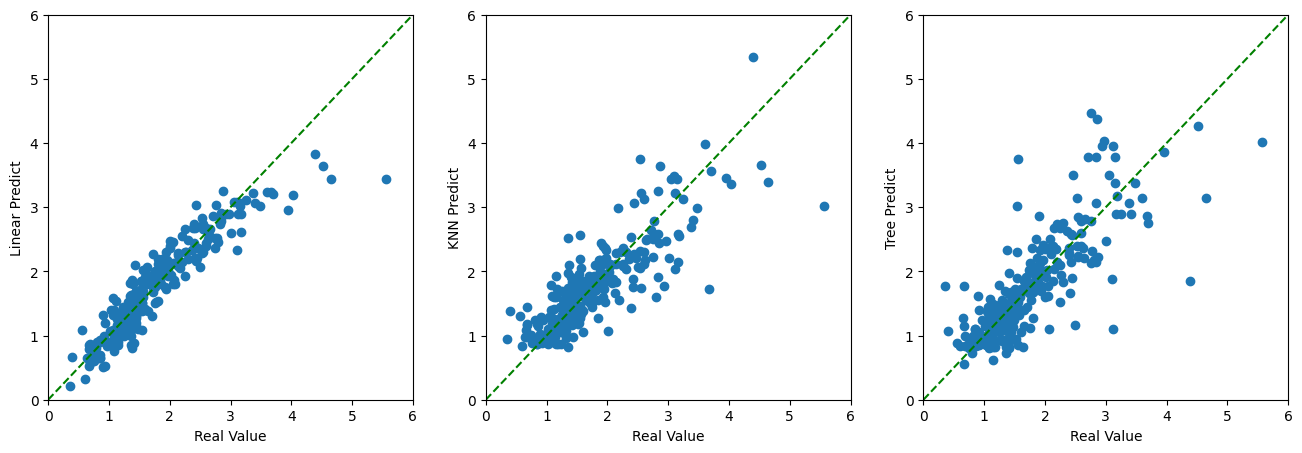

In [400]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3,figsize=(16,5))

#Linear Regression
ax[0].scatter(y_validation/100000,y_pred_lr/100000) #X and Y values ​​on the graph
ax[0].plot((0,70000),(0,70000),'--g') #Defines the scale x, scale y and the color of the line on the middle
ax[0].set(xlim=(0,6), ylim=(0,6)) #defines the min and maximum value of X and Y
ax[0].set_xlabel('Real Value') #defines X name
ax[0].set_ylabel('Linear Predict') #defines Y name

#KNN
ax[1].scatter(y_validation/100000, y_pred_knn/100000)
ax[1].plot((0,70000),(0,70000),'--g')
ax[1].set(xlim=(0,6), ylim=(0,6))
ax[1].set_xlabel('Real Value')
ax[1].set_ylabel('KNN Predict')

#Tree
ax[2].scatter(y_validation/100000, y_pred_dt/100000)
ax[2].plot((0,70000),(0,70000),'--g')
ax[2].set(xlim=(0,6), ylim=(0,6))
ax[2].set_xlabel('Real Value')
ax[2].set_ylabel('Tree Predict')

plt.show()

# I already knew that linear regression is the best algorithm, but with these graphs the conclusion was more visual and interactive

**Submit the prediction**

In [401]:
#Leaving both tables the same
X_test = test_df_2.drop(['Id'],axis=1)

In [402]:
#Using the Linear Logisitic on my test data
y_pred = clf_lr.predict(X_test)

In [403]:
#Creating the colum 'Sale Price'
test_df_2['SalePrice'] = y_pred

In [404]:
#Selecting just the colums 'Id'and 'SalePrice' to send
result1 = test_df_2[['Id','SalePrice']]

In [406]:
#Exporting to .CSV
result1.to_csv('firstResult.csv',index=False)

# The result was 0.20073. An unsatisfactory result was expected, considering that I ignored many columns. In fact, the intention was to discover how efficient the model would be, considering only these columns.